#### Goal: we want to check PyTorch capabilities 
source book: https://1drv.ms/b/s!AjBYpbQNb4YKhapVBDg6irxagUXzzw?e=TVlnzJ  
source docs: https://pytorch.org/get-started/locally/

work management: https://germands.atlassian.net/browse/DTU-9?atlOrigin=eyJpIjoiZTE1ZTM4Yzg4YTcwNDI0Mzg0NjllOWU3NWFjMjA4YTEiLCJwIjoiaiJ9 

In [3]:
# mi CHATGPT: https://chat.openai.com/share/e0160289-11a9-4155-b246-54f9634b7486 

import torch

# Verificar la versión de PyTorch
print("Versión de PyTorch:", torch.__version__)

# Comprobar si MPS (Metal Performance Shaders) está disponible
mps_available = "mps" if torch.backends.mps.is_available() else "cpu"
print("Disponibilidad de MPS:", mps_available)

# Crear un tensor y moverlo al dispositivo disponible
device = torch.device(mps_available)
tensor = torch.rand(3, 3).to(device)
print("Dispositivo del tensor:", tensor.device)
print("Tensor generado:", tensor)


Versión de PyTorch: 2.1.2
Disponibilidad de MPS: mps
Dispositivo del tensor: mps:0
Tensor generado: tensor([[0.3400, 0.9788, 0.6169],
        [0.9522, 0.0760, 0.9235],
        [0.0430, 0.7035, 0.0336]], device='mps:0')


📝 tensors can be understood as a generalization of scalars, vectors, matrices, and so on.

1. Scalar: A rank-0 tensor.
2. Vector: A rank-1 tensor.
3. Matrix: A rank-2 tensor.
4. Matrices stacked in a third dimension: A rank-3 tensor.
5. Tensors in PyTorch: Similar to NumPy's arrays.
6. Tensors are optimized for automatic differentiation.
7. Tensors can run on GPUs.

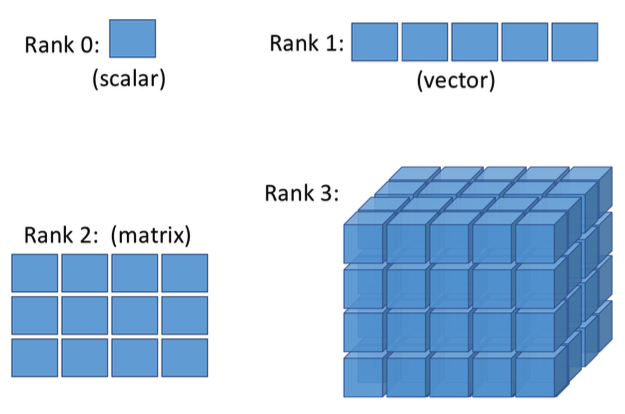

We will check the following content:

1. PyTorch's programming model: Covers creating and manipulating tensors.
2. Loading data and utilizing `torch.utils.data` module: Allows efficient iteration through a dataset.
3. Ready-to-use datasets in `torch.utils.data.Dataset` submodule: Exploring existing datasets.
4. Introduction to the `torch.nn` module: Covers PyTorch neural network.
5. Building machine learning models: Composing and training models.
6. Saving trained models on disk for future evaluation.


In [4]:
import torch
import numpy as np

np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


- Transposing a tensor.
- Reshaping a tensor (for example, from a 1D vector to a 2D array).
- Removing unnecessary dimensions (dimensions that have size 1, which are not needed).


In [8]:
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

t = torch.rand(3, 5)
print(t)
t_tr = torch.transpose(t, 0, 1) 
print(t.shape, ' --> ', t_tr.shape)
print(t_tr)

t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

t_zeros = torch.zeros(1, 2, 1, 4, 1)
print(t_zeros)
t_zeros_sqz = torch.squeeze(t_zeros, 2)
print(t_zeros.shape, ' --> ', t_zeros_sqz.shape)

tensor([[0.5607, 0.9795, 0.3559],
        [0.8238, 0.4929, 0.8283]])
torch.int64
tensor([[0.7436, 0.5926, 0.5841, 0.7445, 0.6599],
        [0.4697, 0.7594, 0.7772, 0.3118, 0.1576],
        [0.7796, 0.0816, 0.9661, 0.6433, 0.3173]])
torch.Size([3, 5])  -->  torch.Size([5, 3])
tensor([[0.7436, 0.4697, 0.7796],
        [0.5926, 0.7594, 0.0816],
        [0.5841, 0.7772, 0.9661],
        [0.7445, 0.3118, 0.6433],
        [0.6599, 0.1576, 0.3173]])
torch.Size([5, 6])
tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])
torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


In [10]:
t_zeros.shape

torch.Size([1, 2, 1, 4, 1])

In [19]:
print(t_zeros[0][0])
print(t_zeros[0][1])
print(t_zeros[0][1][0])
print(t_zeros[0][1][0][0])

tensor([[[0.],
         [0.],
         [0.],
         [0.]]])
tensor([[[0.],
         [0.],
         [0.],
         [0.]]])
tensor([[0.],
        [0.],
        [0.],
        [0.]])
tensor([0.])


#### Applying mathematical operations to tensors

- Linear algebra operations are necessary for building most machine learning models.
- Widely used linear algebra operations include:
  - Element-wise product.
  - Matrix multiplication.
  - Computing the norm of a tensor.




In [20]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [29]:
torch.mean(t3[:, 0])

tensor(0.3491)

In [30]:
t4 = torch.mean(t3, axis=0)
print(t4)
print(torch.mean(t3[:, 0]))

tensor([ 0.3491, -0.0436])
tensor(0.3491)




Snippet 3:


In [31]:
print(t1)
print(t2)
print(torch.transpose(t2, 0, 1))
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])
tensor([[ 0.8590, -0.3406, -1.1948, -0.7627, -0.3245],
        [ 0.7056, -1.2720,  0.0250,  1.3969,  0.2879]])
tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [32]:
(0.51*0.85)+(-0.44*0.70)

0.1255



Snippet 4:


In [ ]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)



Snippet 5:


In [ ]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)



These snippets demonstrate various linear algebra operations using PyTorch, including element-wise product, matrix multiplication, computing the mean, and computing the L2 norm of a tensor.

Let me know if there's anything else I can assist you with!

